In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "D:\DS-DAY3\CC GENERAL.csv" 
df = pd.read_csv(file_path)

In [3]:
X = df[['PURCHASES', 'BALANCE']].values

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

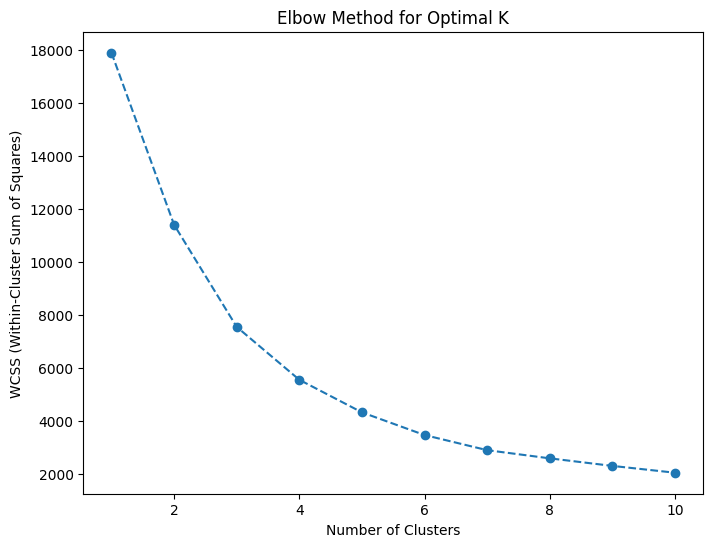

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [8]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

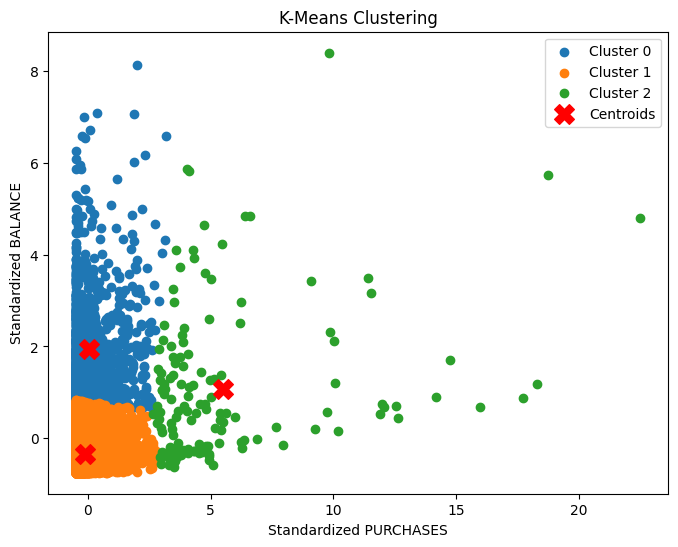

In [9]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(X_scaled[df['Cluster'] == cluster, 0], X_scaled[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Standardized PURCHASES')
plt.ylabel('Standardized BALANCE')
plt.title('K-Means Clustering')
plt.legend()
plt.show()